In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

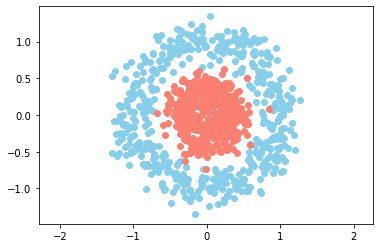

In [3]:
# crear el dataset
n = 1000 # numero de registros en nuestros datos

X, Y = make_circles(n_samples=n, factor=0.3, noise=0.15)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()


In [3]:
# clase de la capa de la red

class neural_layer():
    
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f # función de activación
        
        self.b = np.random.rand(1, n_neur)      * 2 - 1 # parametro de bias -1 a 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # pesos W -1 a 1
        

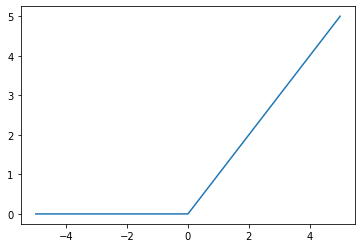

In [4]:
# funciones de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))# sigmoide / derivada de sigm

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 1000)
#plt.plot(_x, sigm[0](_x)) # sigmoide
#plt.plot(_x, sigm[1](_x)) # derivada de sigmoide

plt.plot(_x, relu(_x)) # relu

In [5]:
# l0 = neural_layer(p, 4, sigm)
# l1 = neural_layer(4, 8, sigm)
# ...




# generalizando....
def create_nn(topology, act_f):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn

In [6]:
# función de coste
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp - Yr)) # error cuadratico medio / derivada

# codigo para entrenar

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True):
    
    out = [(None, X)] # vector resultado de cada capa [(z0, a0), (z1, a1), ...]
    
    # foward pass
    
    # z = X @ neural_net[0].W + neural_net[0].b # suma ponderada - detalles: @ multiplicado matricialmente
    # a = neural_net[0].act_f(z) # función de activación
    
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b # out[-1][1] output de la capa anterior
        a = neural_net[l].act_f[0](z)
        
        out.append((z, a))
    
    
    if train:
        # entrenamiento
        # backward pass
        
        deltas = [] # dalta de cada capa
        
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l + 1][0]
            a = out[l + 1][1]

            if l == len(neural_net) - 1:
                
                # calcular delta última capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                # calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
                
            _W = neural_net[l].W
            # gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr

            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
            
        
    return out[-1][1]

In [7]:

#train(neural_net, X, Y, l2_cost, 0.5)
#print("")

Iteración:  2900


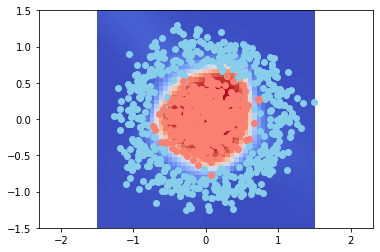

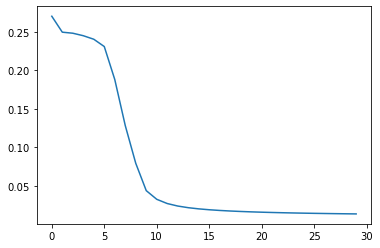

In [8]:
import time
from IPython.display import clear_output


#topology = [p, 4, 8, 16, 8, 4, 1]
#topology = [p, 4, 8, 1]

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

loss = []

for i in range(3000):
    
    # entrenar
    pY = train(neural_net, X, Y, l2_cost, 0.006)
    
    if i % 100 == 0:
        
        loss.append(l2_cost[0](pY, Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
        
        clear_output(wait=True)
        print("Iteración: ", i)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)